<a href="https://colab.research.google.com/github/alessandropequeno/PPGEEC-Deep-Learning-UFRN/blob/main/Quest%C3%A3o4_Lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4-) Utilize uma rede NARX no caso uma rede neural perceptron de múltiplas camadas com realimentação global para fazer a predição de um passo, isto é ^x(n+1), da série temporal x(n) = (1 + sen(n + sen²(n)))^1/2 . Avalie o desempenho apresentando a curva da série para x(n+1) e a curva de predição ^x(n+1) em função em função de n. Esboce também a curva do erro de predição e(n)=x(n+1)-x^(n+1) em função de n.

A Rede Neural Autoregressiva com Entradas Exógenas (NARX) é um tipo de modelo de rede neural usado principalmente para modelagem e previsão de séries temporais. Ao contrário de redes neurais tradicionais que apenas dependem de dados históricos para prever o próximo ponto em uma série temporal, as redes NARX também incorporam entradas exógenas, ou seja, informações externas que podem influenciar a série temporal.

Essa rede neural tem a capacidade de lembrar do seu próprio estado anterior, bem como das entradas exógenas anteriores, para fazer previsões futuras. Ela pode ser usada em uma variedade de aplicações, como previsão de demanda de energia elétrica, previsão de preços de ações, previsão de séries temporais climáticas, entre outros.

A capacidade de incorporar entradas exógenas torna as redes NARX bastante flexíveis e úteis em cenários onde a série temporal de interesse é influenciada por fatores externos.

### 1. Importar as bibliotecas

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 2. Gerar a série Temporal x(n)

In [25]:
n = np.linspace(1, 100, 1000)  # Criando valores de n de 1 a 100
x = np.sqrt(1 + np.sin(n + np.sin(n)**2))  # Gerando série temporal usando a equação fornecida

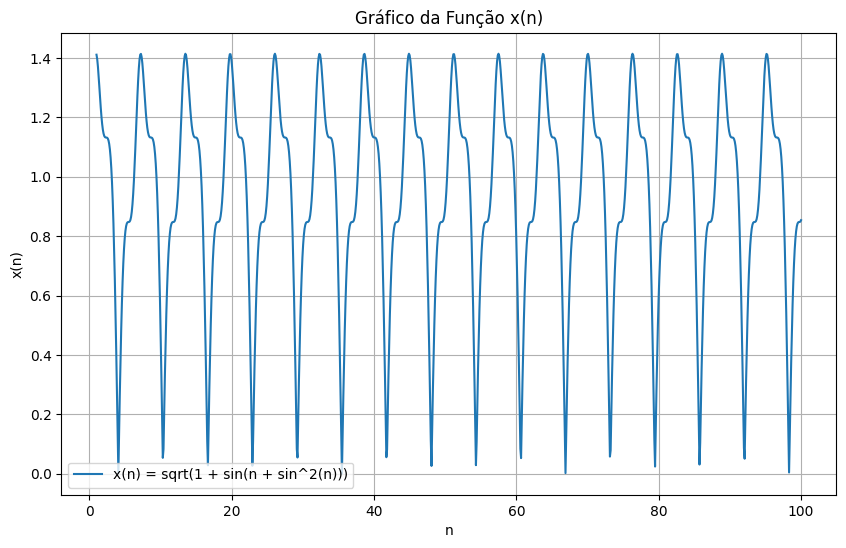

In [26]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(n, x, label='x(n) = sqrt(1 + sin(n + sin^2(n)))')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('Gráfico da Função x(n)')
plt.legend()
plt.grid(True)
plt.show()

### 3. Prepar os dados de entrada e saída

Definindo os dados de entrada (x(n)x(n)) e saída desejada (x(n+1)x(n+1)). O valor de entrada para cada ponto na série temporal é x(n)x(n), e o valor de saída desejada é o próximo ponto na série temporal x(n+1)x(n+1).


Na abordagem da rede NARX, é incluido a variável de tempo nn como uma entrada exógena. Isso é feito através da função np.vstack((x[:-1], n[:-1])).T, que empilha verticalmente os arrays xx e nn e então transpõe o resultado para que cada linha represente um par (x(n),n)(x(n),n).

In [27]:
x_train = np.vstack((x[:-1], n[:-1])).T
y_train = x[1:]

### 4. Definindo o modelo da rede neural

Este modelo consiste em três camadas densas (totalmente conectadas), onde a primeira camada tem 10 neurônios, a segunda camada tem 10 neurônios e a camada de saída tem 1 neurônio. Usamos a função de ativação ReLU ('relu') para as camadas ocultas.

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'),  # Camada de entrada
    tf.keras.layers.Dense(32, activation='relu'),  # Camada oculta
    tf.keras.layers.Dense(32, activation='relu'),  # Camada oculta
    tf.keras.layers.Dense(1)  # Camada de saída
])

A rede neural NARX leve em consideração tanto a série temporal passada quanto informações externas, como a variável de tempo, ao fazer suas previsões. Isso pode ser útil em muitos cenários onde as séries temporais são influenciadas por fatores externos.


### 5. Compilar Modelo

In [29]:
model.compile(optimizer='adam', loss='mse')

### 6. Treinando o Modelo

In [30]:
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9856
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/100
32/32 [=================

### 7. Realizando a predição

In [31]:
x_pred = model.predict(x_train)

32/32 [==============================] - 0s 1ms/step


### 8. Calcular o erro de predição

In [32]:
erro = y_train - x_pred.flatten()

### 9. Mostrar os gráficos resultantes

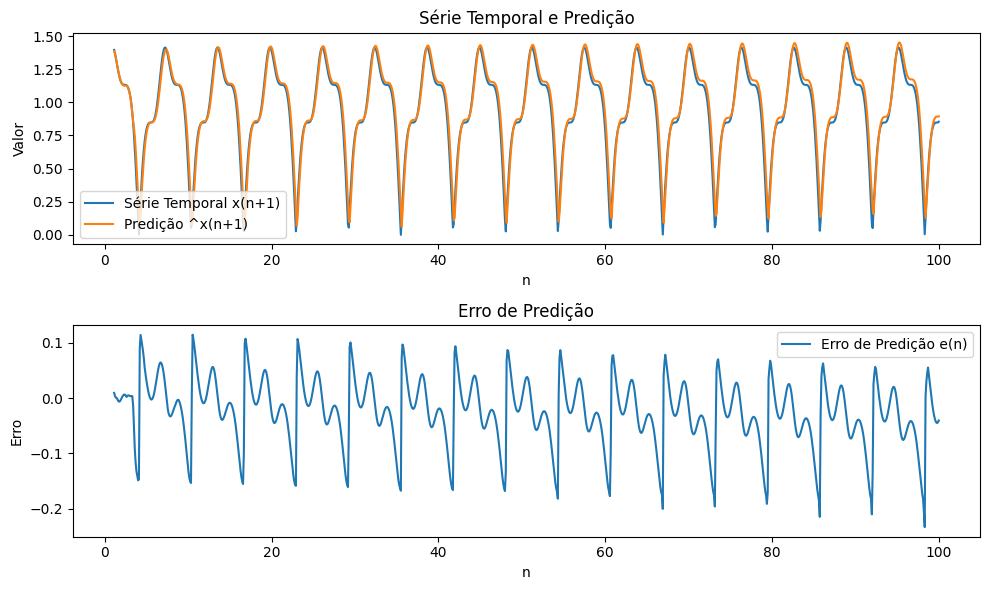

In [33]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(n[1:], x[1:], label='Série Temporal x(n+1)')
plt.plot(n[1:], x_pred, label='Predição ^x(n+1)')
plt.xlabel('n')
plt.ylabel('Valor')
plt.title('Série Temporal e Predição')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(n[1:], erro, label='Erro de Predição e(n)')
plt.xlabel('n')
plt.ylabel('Erro')
plt.title('Erro de Predição')
plt.legend()

plt.tight_layout()
plt.show()

No primeiro gráfico, podemos observar duas linhas: uma representando a série temporal real x(n+1)x(n+1) e outra representando a predição (^x(n+1)) feita pela rede neural. Se a predição for precisa, essas duas linhas devem se sobrepor ou estar muito próximas.

Se as duas linhas estiverem muito próximas, isso indica que o modelo de rede neural foi capaz de aprender padrões na série temporal e fazer previsões razoavelmente precisas. No entanto, se houver uma diferença significativa entre as duas linhas, indica que o modelo pode não ter capturado adequadamente os padrões na série temporal ou pode ter sido subtreinado.

**O gráfico de erro de predição mostra um padrão periódico**, isso pode indicar a presença de um padrão na série temporal que o modelo não foi capaz de capturar completamente. Podemos ter algumas interpretações possíveis desse padrão:

 **Padrão não capturado pelo modelo:**
    O padrão periódico no erro de predição sugere que o modelo pode não estar conseguindo capturar completamente as variações na série temporal. Se o modelo não inclui componentes suficientes para modelar a periodicidade na série, isso pode levar a previsões imprecisas e, consequentemente, a um padrão periódico no erro de predição.

**Subajuste do modelo:**
    O modelo pode estar subajustado, ou seja, não está sendo complexo o suficiente para capturar todos os padrões na série temporal. Isso pode resultar em previsões imprecisas e padrões periódicos no erro de predição, onde o modelo está constantemente subestimando ou superestimando os valores reais da série temporal.

**Padrão na série temporal não modelado:**
    A presença de um padrão periódico no erro de predição pode indicar a presença de uma componente periódica na série temporal que o modelo não está considerando. Isso pode incluir sazonalidades, ciclos ou outros padrões periódicos que não foram incluídos no modelo.

**Overfitting com ruído:**
    Por outro lado, se o modelo for muito complexo ou se ajustar demais aos dados de treinamento, ele pode começar a capturar o ruído nos dados em vez dos padrões reais. Isso pode resultar em previsões imprecisas e um padrão aparente no erro de predição, que não reflete necessariamente a estrutura verdadeira da série temporal.

Em qualquer caso, a identificação desse padrão periódico no erro de predição indica que o modelo pode precisar de ajustes adicionais para melhorar sua capacidade de previsão e capturar os padrões na série temporal com mais precisão. Isso pode envolver a adição de mais recursos, ajuste dos hiperparâmetros do modelo ou consideração de modelos mais avançados para lidar com a complexidade dos dados.